# Bay wheels System Data Analysis
## by Victoria Perez Mola

## Investigation Overview

This investigation performs a visual exploration on a dattaset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The main question behind this investigations is **When are the users using the bikes the most?**

We want to understand the following questions: 

🚴‍♂️ *Is there any peak on the rides any particular time of the day?*

🚴‍♂️ *Does this varies weekdays vs weekends?* 

🚴‍♂️ *Does the season of the year affects the frequency of the rides?*

🚴‍♂️ *Does any of this variables affect the duration of the rides?*

🚴‍♂️ *Does this has any relation with the user type?*




## Dataset Overview

The dataset chosen to perform an analysis is the [Bay wheels (ex Ford GoBike) System Data](https://www.lyft.com/bikes/bay-wheels/system-data).


# 2,8 Million rides from March 2019 to February 2020

Each trip is anonymized and includes:
* Trip Duration (seconds)              
* Start Time and Date                  
* End Time and Date
* Start Station ID                     
* Start Station Name
* Start Station Latitude               
* Start Station Longitude
* End Station ID                       
* End Station Name
* End Station Latitude                 
* End Station Longitude
* Bike ID                              
* User Type (Subscriber or Customer)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from os import listdir
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Results/baywheels-tripdata.csv')

In [3]:
#set color palette for visualizations
base_color = sb.color_palette()[0]
secondary_color = sb.color_palette()[4]


# set labels for graphs
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = ['Jan', 'Feb','Mar','Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']

# When are the rides taking place? 

🚴‍♂️ Is there any peak on the rides any particular time of the day?

🚴‍♂️ Does this varies weekdays vs weekends?

🚴‍♂️ Does the season of the year affects the frequency of the rides?

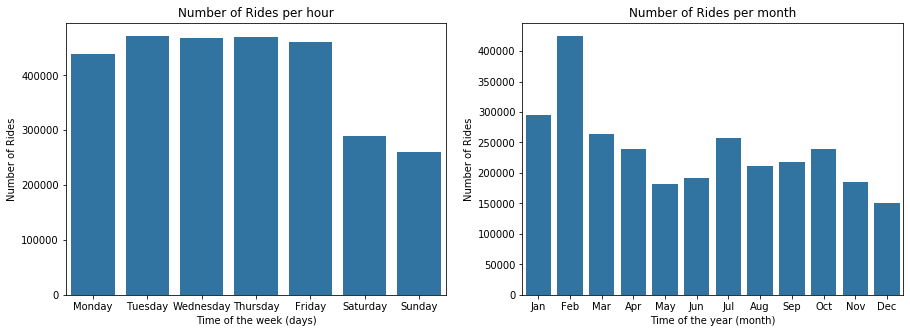

In [4]:
plt.figure(figsize=(15,5))

#plot the number of rides per weekday
plt.subplot(121)
ax = sb.countplot(data = df, x = 'start_day',
             color = base_color);

# set days names as labels
ax.set(xticks=range(7), xticklabels=day_labels)

plt.xlabel("Time of the week (days)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per hour")


plt.subplot(122)
#plot the number of rides per month
ax = sb.countplot(data = df, x = 'start_month', color = base_color);

# set month names as labels
ax.set(xticks=range(12), xticklabels = month_labels)

plt.xlabel("Time of the year (month)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per month");

In [5]:
#create two dataframes to separete weekdays from weekends
weekday = [0,1,2,3,4,5]
weekend = [6,7]

df_weekday = df[df['start_day'].isin(weekday)]
df_weekend = df[df['start_day'].isin(weekend)]

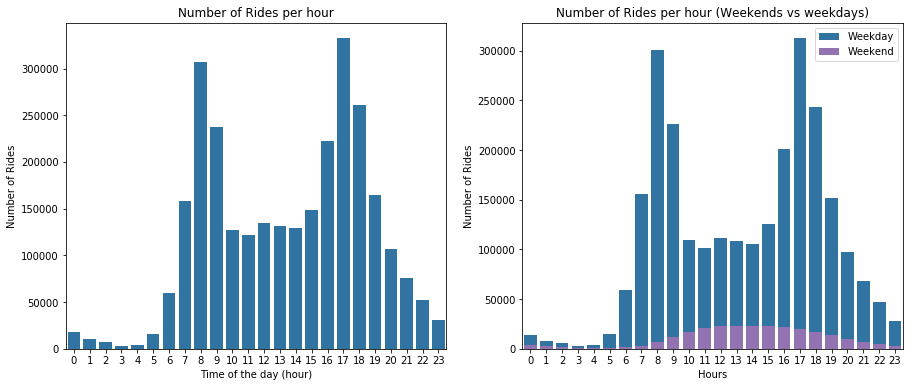

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(121)
#plot the number of rides per month
fig = sb.countplot(data = df, x = 'start_hour', color = base_color);

plt.xlabel("Time of the day (hour)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per hour")


plt.subplot(122)
#plot the number of rides during different hours in the week days 
fig = sb.countplot(data = df_weekday, x = 'start_hour', color = base_color);

#plot the number of rides during different hours in the weekend 
fig = sb.countplot(data = df_weekend, x = 'start_hour', color = secondary_color);

fig.legend(labels=["Weekday","Weekend"])

plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per hour (Weekends vs weekdays)");

# How long are the rides?

🚴‍♂️ Does any of this variables affect the duration of the rides?


In [7]:
#Add duration in minutes to make it easier to read
df['duration_min'] = df['duration_sec']/60

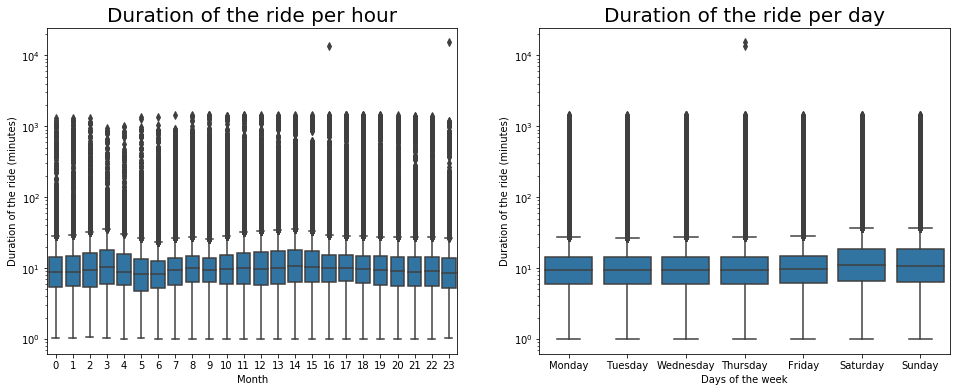

In [8]:
f, ax = plt.subplots(figsize=(25, 6))

plt.subplot(131)
#plot trip time across different hours of the day
ax = sb.boxplot(data = df, x = 'start_hour', y = 'duration_min', color = base_color);

ax.set_yscale("log")
plt.xlabel("Month")
plt.ylabel("Duration of the ride (minutes)")
plt.title("Duration of the ride per hour", fontsize=20)

plt.subplot(132)
#plot trip time across different days of the week
ax = sb.boxplot(data = df, x = 'start_day', y = 'duration_min', color = base_color);
ax.set(xticks=range(7), xticklabels=day_labels)
ax.set_yscale("log")
plt.xlabel("Days of the week")
plt.ylabel("Duration of the ride (minutes)")
plt.title("Duration of the ride per day", fontsize=20);

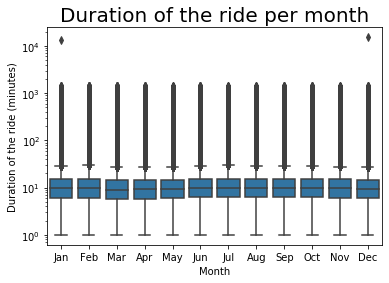

In [9]:
#plot trip time across different days of the week
ax = sb.boxplot(data = df, x = 'start_month', y = 'duration_min', color = base_color);

ax.set(xticks=range(12), xticklabels=month_labels)
ax.set_yscale("log")
plt.xlabel("Month")
plt.ylabel("Duration of the ride (minutes)")
plt.title("Duration of the ride per month", fontsize=20);

# Do Suscribers and customers behave diferently? 

🚴‍♂️ Does any of the trends seen before have a relation with the user type?

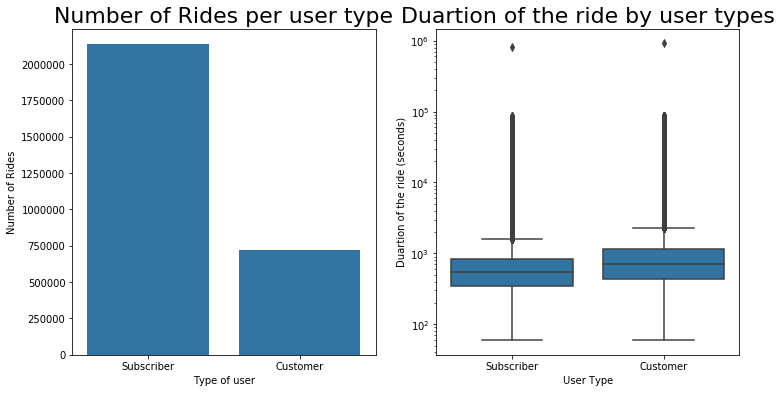

In [10]:
f, ax = plt.subplots(figsize=(25, 6))

plt.subplot(141)
# plot the number of rides by user type
#sb.set(rc={'figure.figsize':(8,6)})
ax = sb.countplot(data = df, x = 'user_type', color = base_color);

plt.xlabel("Type of user")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per user type",fontsize = 22)

plt.subplot(142)
#plot duration vs user_type with a log scale
#f, ax = plt.subplots(figsize=(7, 6))
ax = sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
ax.set_yscale("log")
plt.xlabel("User Type")
plt.ylabel("Duartion of the ride (seconds)")
plt.title("Duartion of the ride by user types", fontsize=22);

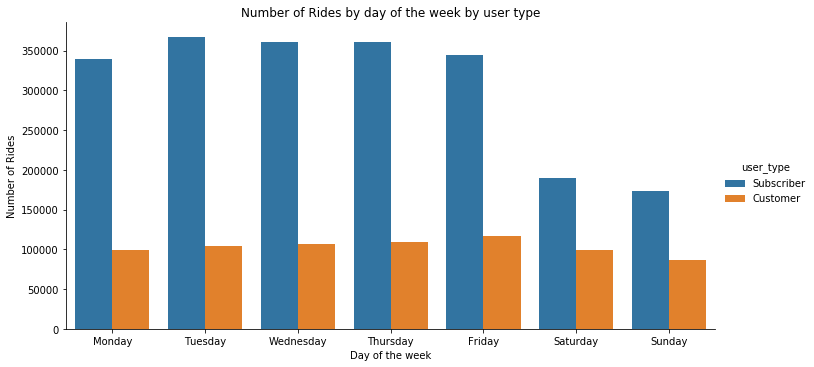

In [11]:
#plot the number of rides per day of week per user_type
ax = sb.catplot(x='start_day', hue='user_type', kind='count', data=df,height=5, aspect=2);

ax.set(xticks=range(7), xticklabels=day_labels)

plt.xlabel("Day of the week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by day of the week by user type");

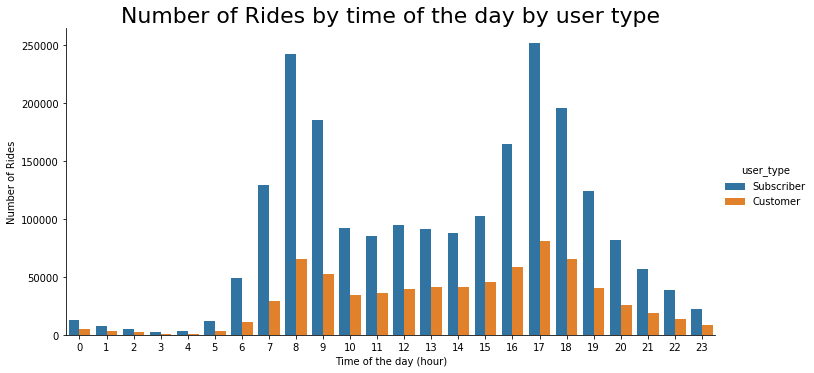

In [12]:
#plot the number of rides per time of the dayper user_type
sb.catplot(x='start_hour', hue='user_type', kind='count', data=df,height=5, aspect=2);

plt.xlabel("Time of the day (hour)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by time of the day by user type", fontsize=22);

## Conclusions

- Most of the rides take place on **weekdays** and more specaifically **during peak hours** (exactly at 8am and 5pm)
- The ride has an average duration of 13 minutes
- Casual customers tend to have slightier longer rides and there's not much difference between working days and weekends.

All of this leads me to think that the main target group are sucribers who use the bike sharing service to commute to work. But there is an opportunity to offer suscription deals for the casual customers, a group whose main purpose of the rides seems to be leisure. 
